In [42]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv("ALL_SPB_STOPS.csv", sep=";", encoding='cp1251')
data

,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE
0,100101,Пр.Ветеранов-1,59.841604,30.253984
1,100102,Пр.Ветеранов-2,59.842042,30.250084
2,100103,Ленинский пр.-1,59.851683,30.268385
3,100104,Ленинский пр.-2,59.849710,30.268348
4,100105,Автово,59.867292,30.261133
5,100106,Кировский завод,59.879753,30.261631
6,100107,Нарвская,59.901064,30.274819
7,100108,Балтийская,59.907428,30.299786
8,100109,Пушкинская,59.920514,30.329678
9,100110,Владимирская,59.927611,30.348374


In [43]:
coords = (59.931585, 30.360496) #Площадь восстания
vosstaniya = pd.DataFrame({'ID_STOP':[], 'LATITUDE':[], 'LONGITUDE':[]})
vosstaniya.head()

,ID_STOP,LATITUDE,LONGITUDE


In [44]:
import geopy
import geopy.distance

for index, row in data.iterrows():
    if row.ID_STOP != 100111 :
        current_station_coords = (row.LATITUDE, row.LONGITUDE)
        stations_distance = geopy.distance.geodesic(coords, current_station_coords).m
        if stations_distance <= 1000 :
            vosstaniya.loc[len(vosstaniya)] = [row.ID_STOP, row.LATITUDE, row.LONGITUDE]
vosstaniya_coords = data[['ID_STOP', 'STOP_NAME']]
vosstaniya.merge(vosstaniya_coords, how='left')

,ID_STOP,LATITUDE,LONGITUDE,STOP_NAME
0,100110.0,59.927611,30.348374,Владимирская
1,100112.0,59.929490,30.360924,Пл. Восстания-2
2,100304.0,59.931592,30.355142,Маяковская
3,100408.0,59.928236,30.346339,Достоевская
4,1377.0,59.936895,30.364611,"БКЗ ""ОКТЯБРЬСКИЙ"""
5,1478.0,59.936163,30.375521,ДЕГТЯРНАЯ УЛ. [15]
6,14907.0,59.929517,30.347792,"Владимирская площадь (3, 8, 15)"
7,14909.0,59.933391,30.348150,"Невский проспект (3, 8, 15)"
8,14913.0,59.935277,30.348282,"Улица Жуковского (3, 8, 15)"
9,14968.0,59.932382,30.349310,"Литейный проспект (1, 5, 7, 10, 11, 22)"


In [45]:
from sklearn.cluster import KMeans

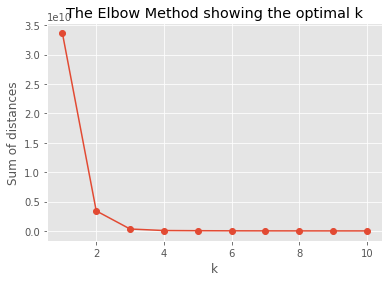

In [46]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(vosstaniya) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [61]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(vosstaniya)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [62]:
vosstaniya['cluster'] = model.labels_


In [63]:
vosstaniya.merge(vosstaniya_coords, how='left')

,ID_STOP,LATITUDE,LONGITUDE,cluster,STOP_NAME
0,100110.0,59.927611,30.348374,1,Владимирская
1,100112.0,59.929490,30.360924,1,Пл. Восстания-2
2,100304.0,59.931592,30.355142,1,Маяковская
3,100408.0,59.928236,30.346339,1,Достоевская
4,1377.0,59.936895,30.364611,0,"БКЗ ""ОКТЯБРЬСКИЙ"""
5,1478.0,59.936163,30.375521,0,ДЕГТЯРНАЯ УЛ. [15]
6,14907.0,59.929517,30.347792,2,"Владимирская площадь (3, 8, 15)"
7,14909.0,59.933391,30.348150,2,"Невский проспект (3, 8, 15)"
8,14913.0,59.935277,30.348282,2,"Улица Жуковского (3, 8, 15)"
9,14968.0,59.932382,30.349310,2,"Литейный проспект (1, 5, 7, 10, 11, 22)"


In [64]:
vosstaniya[vosstaniya.cluster == 0].merge(vosstaniya_coords, how='left')

,ID_STOP,LATITUDE,LONGITUDE,cluster,STOP_NAME
0,1377.0,59.936895,30.364611,0,"БКЗ ""ОКТЯБРЬСКИЙ"""
1,1478.0,59.936163,30.375521,0,ДЕГТЯРНАЯ УЛ. [15]
2,1590.0,59.936998,30.360136,0,КОВЕНСКИЙ ПЕР. [22]
3,1625.0,59.926074,30.358006,0,КУЗНЕЧНЫЙ ПЕРЕУЛОК
4,1660.0,59.932567,30.349424,0,"ЛИТЕЙНЫЙ ПР. [3, 7, 22, 27]"
5,1673.0,59.938435,30.366766,0,"МАЛЬЦЕВСКИЙ РЫНОК [15, 74]"
6,1691.0,59.929226,30.360325,0,МОСКОВСКИЙ ВОКЗАЛ
7,1806.0,59.928374,30.372271,0,"ПОЛТАВСКАЯ УЛ. [24, 27]"
8,2090.0,59.931636,30.357231,0,ПЛ. ВОССТАНИЯ
9,2119.0,59.930154,30.367271,0,"СУВОРОВСКИЙ ПР. [24, 27, 15]"


In [65]:
vosstaniya[vosstaniya.cluster == 1].merge(vosstaniya_coords, how='left')

,ID_STOP,LATITUDE,LONGITUDE,cluster,STOP_NAME
0,100110.0,59.927611,30.348374,1,Владимирская
1,100112.0,59.929490,30.360924,1,Пл. Восстания-2
2,100304.0,59.931592,30.355142,1,Маяковская
3,100408.0,59.928236,30.346339,1,Достоевская


In [66]:
vosstaniya[vosstaniya.cluster == 2].merge(vosstaniya_coords, how='left')

,ID_STOP,LATITUDE,LONGITUDE,cluster,STOP_NAME
0,14907.0,59.929517,30.347792,2,"Владимирская площадь (3, 8, 15)"
1,14909.0,59.933391,30.348150,2,"Невский проспект (3, 8, 15)"
2,14913.0,59.935277,30.348282,2,"Улица Жуковского (3, 8, 15)"
3,14968.0,59.932382,30.349310,2,"Литейный проспект (1, 5, 7, 10, 11, 22)"
4,14991.0,59.929504,30.371201,2,Проспект Бакунина (10)
5,14994.0,59.932002,30.375797,2,5-я Советская улица (10)
6,15005.0,59.933001,30.376600,2,5-я Советская улица (10)
7,15008.0,59.929202,30.372198,2,Проспект Бакунина (10)
8,15469.0,59.931403,30.356970,2,"Метро ""Площадь Восстания"" (1, 5, 7, 10, 11, 22)"
9,15479.0,59.929572,30.368301,2,"Суворовский просп. / Невский просп. (1, 10, 16..."
